64 64


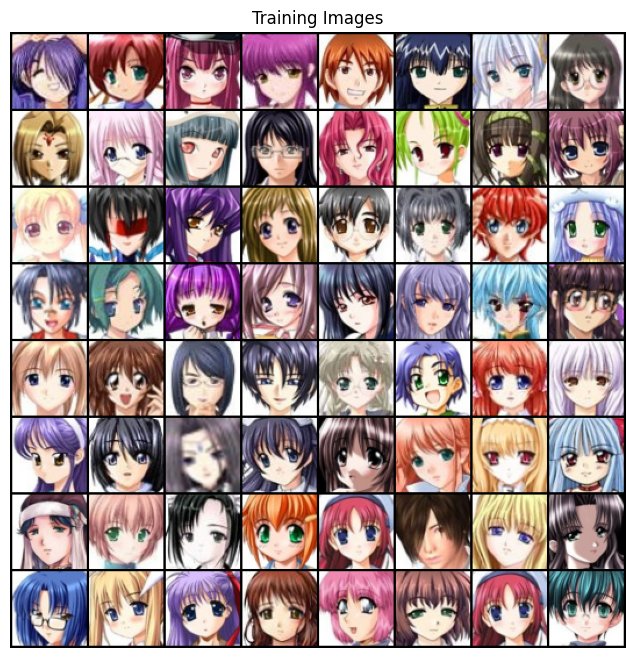

In [2]:
import fire
import torch
from config import Config
from dataset import AtomicDataset
from matplotlib import pyplot as plt
import torchvision.utils as vutils
import numpy as np
#判断使用的设备
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

def train(**kwargs):
    #通过传入的参数初始化Config
    defaultConfig = Config(kwargs)
    #通过给定的目录和图像大小转换成数据集
    dataset=AtomicDataset(defaultConfig.img_root,defaultConfig.img_size)
    #转换为可迭代的批次为defaultConfig.batch_size的数据集
    loader=dataset.toBatchLoader(defaultConfig.batch_size)
    for (img,cls) in loader:
        print(len(img),len(cls))
        break;
    real_batch=next(iter(loader))
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Training Images")
    plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
train()